In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
X_train = pd.read_csv('../data/processed/X_train_l2.csv')
X_test = pd.read_csv('../data/processed/X_test_l2.csv')
y_train_multi = pd.read_csv('../data/processed/y_train_multiclass.csv').values.ravel()
y_test_multi = pd.read_csv('../data/processed/y_test_multiclass.csv').values.ravel()

In [3]:
print(X_train.shape, y_train_multi.shape)
print(X_test.shape, y_test_multi.shape)

(125973, 122) (125973,)
(22544, 122) (22544,)


In [4]:
y_train_multi = pd.Series(y_train_multi)
y_test_multi = pd.Series(y_test_multi)

print("Train NaNs:", y_train_multi.isna().sum())
print("Test NaNs:", y_test_multi.isna().sum())


Train NaNs: 0
Test NaNs: 0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_multi)
y_test_enc = le.transform(y_test_multi)


print("Classes:", le.classes_)

Classes: ['dos' 'normal' 'probe' 'r2l' 'u2r']


In [27]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(X_train, y_train_enc)
y_pred=gnb.predict(X_test)
y_prob = gnb.predict_proba(X_test)

Classification Report:
               precision    recall  f1-score   support

         dos       0.77      0.18      0.29      7458
      normal       0.50      0.77      0.60      9711
       probe       0.65      0.13      0.22      2421
         r2l       0.48      0.37      0.42      2887
         u2r       0.02      0.90      0.04        67

    accuracy                           0.45     22544
   macro avg       0.48      0.47      0.31     22544
weighted avg       0.60      0.45      0.43     22544



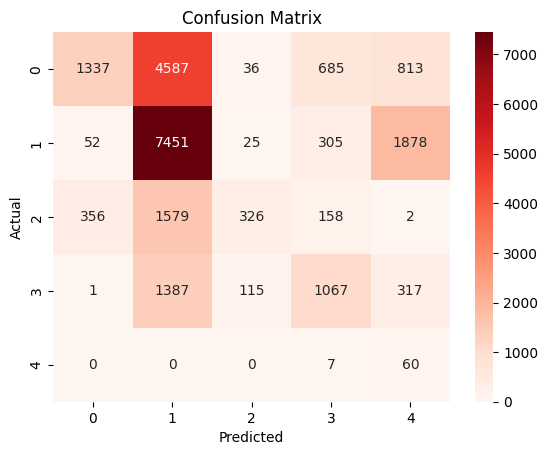

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

print("Classification Report:\n", classification_report(y_test_enc, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_test_enc, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential(
    [
        Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(100, activation='relu'),
        Dense(len(le.classes_), activation='softmax')
    ]
)

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    "best_ann_model.h5",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)


history_binary = model.fit(
    X_train,
    y_train_enc,
    validation_data=(X_test, y_test_enc),
    epochs=200,
    batch_size=256,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/200


C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


472/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8569 - loss: 0.5901
Epoch 1: val_loss improved from None to 1.41858, saving model to best_ann_model.h5



Epoch 1: finished saving model to best_ann_model.h5
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9076 - loss: 0.3379 - val_accuracy: 0.6971 - val_loss: 1.4186
Epoch 2/200
479/493 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9479 - loss: 0.1716
Epoch 2: val_loss did not improve from 1.41858
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9526 - loss: 0.1555 - val_accuracy: 0.7173 - val_loss: 1.4470
Epoch 3/200
467/493 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9645 - loss: 0.1165
Epoch 3: val_loss did not improve from 1.41858
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9674 - loss: 0.1092 - val_accuracy: 0.7339 - val_loss: 1.5797
Epoch 4/200
489/493 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9734 - loss: 0.0892
Epoch 4: val_loss did not improve from 1.41858
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9755 - loss: 0.0849 - val_accuracy: 0.7414 - val_loss: 1.6725
Epoch 5/200
460/493 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9778 - los

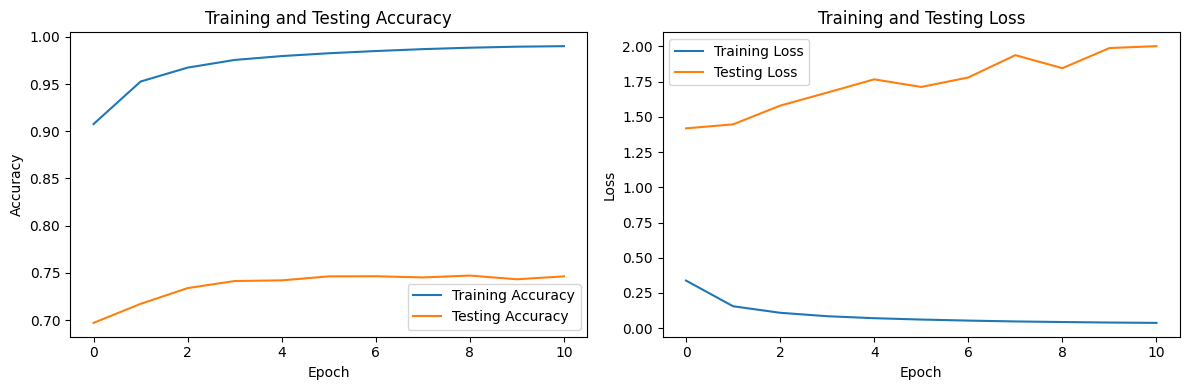

In [19]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_binary.history['accuracy'], label='Training Accuracy')
plt.plot(history_binary.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_binary.history['loss'], label='Training Loss')
plt.plot(history_binary.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()

plt.tight_layout()
plt.show()

705/705 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step
Classification Report:
               precision    recall  f1-score   support

         dos       0.89      0.69      0.78      7458
      normal       0.63      0.97      0.76      9711
       probe       0.69      0.46      0.55      2421
         r2l       0.00      0.00      0.00      2887
         u2r       0.00      0.00      0.00        67

    accuracy                           0.70     22544
   macro avg       0.44      0.42      0.42     22544
weighted avg       0.64      0.70      0.64     22544



C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packag

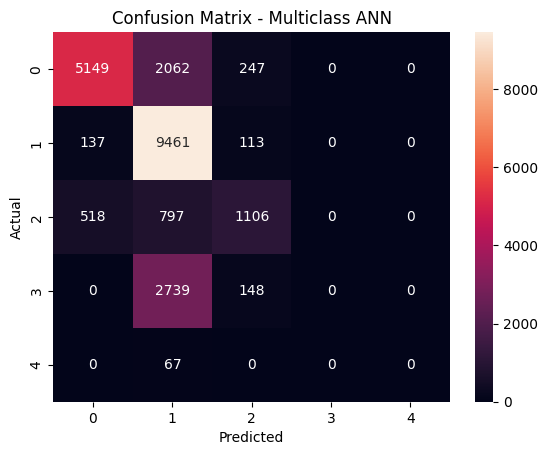

In [24]:
y_prob_ann = model.predict(X_test)

# Convert probabilities → binary labels
y_pred_ann = y_prob_ann.argmax(axis=1)


# Metrics
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n",
      classification_report(y_test_enc, y_pred_ann, target_names=le.classes_))
      
cm = confusion_matrix(y_test_enc, y_pred_ann)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Multiclass ANN")
plt.show()

In [25]:
from sklearn.svm import SVC

svm = SVC(
    kernel='linear',
    C=1.0,
    gamma='scale',
    decision_function_shape='ovr',  # one-vs-rest (default for multiclass)
    probability=True,
    random_state=42
)

svm.fit(X_train, y_train_enc)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [26]:
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)

from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score

print("Classification Report:\n")
print(classification_report(y_test_enc, y_pred_svm, target_names=le.classes_))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test_enc, y_pred_svm))

print("Macro F1:", f1_score(y_test_enc, y_pred_svm, average='macro'))
print("Weighted F1:", f1_score(y_test_enc, y_pred_svm, average='weighted'))
print("Micro F1:", f1_score(y_test_enc, y_pred_svm, average='micro'))


Classification Report:

              precision    recall  f1-score   support

         dos       0.83      0.66      0.74      7458
      normal       0.60      0.93      0.73      9711
       probe       0.73      0.45      0.56      2421
         r2l       0.00      0.00      0.00      2887
         u2r       0.00      0.00      0.00        67

    accuracy                           0.67     22544
   macro avg       0.43      0.41      0.40     22544
weighted avg       0.61      0.67      0.62     22544

Confusion Matrix:

[[4937 2326  195    0    0]
 [ 603 9010   98    0    0]
 [ 410  918 1093    0    0]
 [  15 2751  121    0    0]
 [   0   67    0    0    0]]
Macro F1: 0.4038463414559833
Weighted F1: 0.6163251504835475
Micro F1: 0.6671398154719659


C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packag

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=5,          # as stated in paper
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train_multi)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)


Classification Report:
               precision    recall  f1-score   support

         dos       0.96      0.82      0.88      7458
      normal       0.66      0.98      0.79      9711
       probe       0.83      0.64      0.73      2421
         r2l       0.60      0.00      0.00      2887
         u2r       0.71      0.07      0.14        67

    accuracy                           0.76     22544
   macro avg       0.75      0.50      0.51     22544
weighted avg       0.77      0.76      0.71     22544



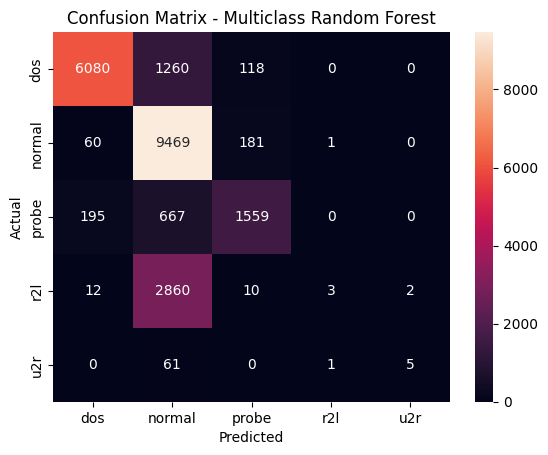

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n",
      classification_report(y_test_multi, y_pred_rf, target_names=le.classes_))

cm = confusion_matrix(y_test_multi, y_pred_rf)

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    xticklabels=le.classes_,
    yticklabels=le.classes_
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Multiclass Random Forest")
plt.show()
